In [1]:
from model import *
from agents import *
from globals import *
# from server import *
from schedule import *
from utility import *

In [2]:
from mesa.batchrunner import BatchRunner, BatchRunnerMP

fixed_params = {"N": 1000,
                "network_type": 2,
                "no_of_neighbors": 3,
                "beta_component": 0.15,
                "social_influence": 0.06,
                "swingers": 3,
#                 "malicious_N":0,
                "echo_limit":0.95,
                "all_majority": False,
                "similarity_treshold": 0.16,
#                 "malicious_N": 0,
                "opinions": 2,
               }
variable_params = {"seed": list(range(1, 31)),
                "malicious_N":list(range(0, 6)),
                  }

batch_run = BatchRunnerMP(Network,
                        iterations=1,
                        max_steps=100,
                        fixed_parameters=fixed_params,
                        variable_parameters=variable_params,
#                         model_reporters=model_reporters, 
                        nr_processes=4,
                        model_reporters={                
                            "radical_opinions": compute_radical_opinions,
                            "community_no": community_no,
#                             "echo_chambers": echo_no,
                            "majority_opinion": compute_majority_opinions,
                            "silent_spiral": compute_silent_spiral,
                            "compute_transitivity":compute_transitivity,
                            "compute_echo_chamber":compute_echo_chamber,
                            "echochamber_size":echochamber_size,
                            "echochamber_count":echochamber_count
                        })
batch_run.run_all()
data = batch_run.get_model_vars_dataframe()

#print data
print(data)

180it [41:43, 14.70s/it]

     seed  malicious_N  Run  community_no  compute_echo_chamber  \
0       1            0    0            12                    66   
1       1            1    1            12                   101   
2       1            2    2            12                   112   
3       1            3    3            12                   135   
4       1            4    4            13                   117   
5       1            5    5            12                   114   
6       2            0    6            12                    81   
7       2            1    7            13                   129   
8       2            2    8            14                   146   
9       2            3    9            14                   119   
10      2            4   10            12                   178   
11      2            5   11            15                   121   
12      3            0   12            12                    50   
13      3            1   13            13                    7

In [9]:
data.to_pickle("/Data/malicious_N.pkl")

     seed  malicious_N  Run  community_no  compute_echo_chamber  \
0       1            0    0            12                    66   
1       1            1    1            12                   101   
2       1            2    2            12                   112   
3       1            3    3            12                   135   
4       1            4    4            13                   117   
5       1            5    5            12                   114   
6       2            0    6            12                    81   
7       2            1    7            13                   129   
8       2            2    8            14                   146   
9       2            3    9            14                   119   
10      2            4   10            12                   178   
11      2            5   11            15                   121   
12      3            0   12            12                    50   
13      3            1   13            13                    7

     seed  malicious_N  Run  community_no  compute_echo_chamber  \
0       1            0    0            12                    66   
6       2            0    6            12                    81   
12      3            0   12            12                    50   
18      4            0   18            12                    99   
24      5            0   24            13                   104   
30      6            0   30            14                    56   
36      7            0   36            13                    86   
42      8            0   42            13                    76   
48      9            0   48            12                    85   
54     10            0   54            12                    74   
60     11            0   60            12                    88   
66     12            0   66            12                    73   
72     13            0   72            12                    82   
78     14            0   78            10                    8

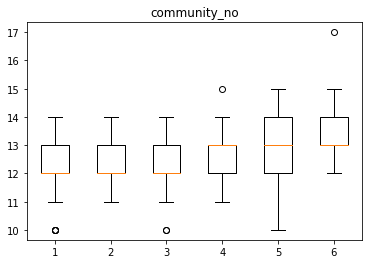

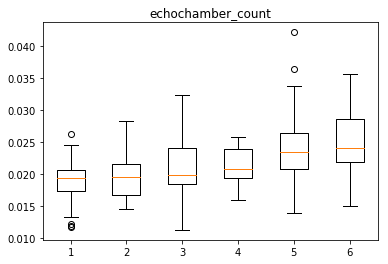

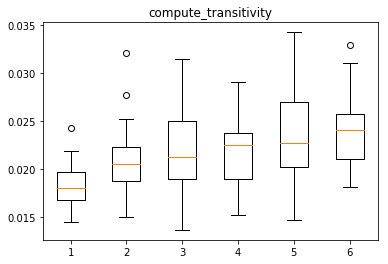

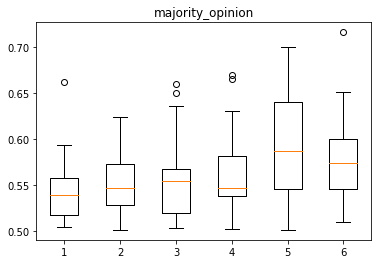

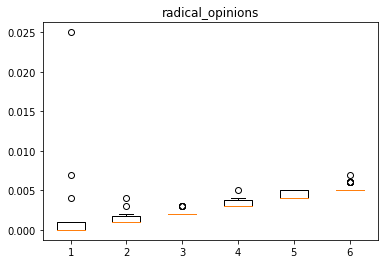

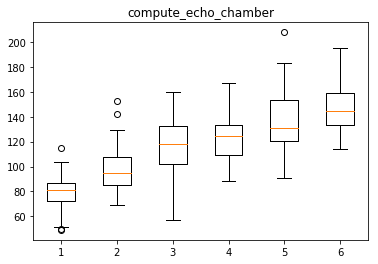

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_pickle("./Data/malicious_N.pkl")

m_0 = data.loc[data['malicious_N'] == 0]
m_1 = data.loc[data['malicious_N'] == 1]
m_2 = data.loc[data['malicious_N'] == 2]
m_3 = data.loc[data['malicious_N'] == 3]
m_4 = data.loc[data['malicious_N'] == 4]
m_5 = data.loc[data['malicious_N'] == 5]
print(m_0)
ouputs = ["community_no","echochamber_count","compute_transitivity","majority_opinion","radical_opinions","compute_echo_chamber"]
data_set = [m_0,m_1, m_2,m_3,m_4,m_5]

for output in ouputs:
    data_box = []
    for d in data_set:
        dat = d[output]
#         q = df["col"].quantile(0.99)
        data_box.append(dat)
#     print(data_box)
    plt.boxplot(data_box)
    plt.title(output)
    plt.show()
    
    


In [ ]:
malicious_op = list(range(0,6))
print(malicious_op)

data_frames = []
all_data = []
for malicious in malicious_op:
    for i in range(30):
        print("malicious_N = ", malicious, "iters = ", i)
        network = Network(N=1000, no_of_neighbors=4, network_type=2, beta_component=.3, similarity_treshold=.006, social_influence=0.16, swingers=5, malicious_N=malicious, all_majority=False,opinions=2, echo_limit = 0.95, seed=1)

        for j in range(100):
            network.step()

        agent_preference = network.datacollector.get_model_vars_dataframe()
        data_frames.append(agent_preference)
    all_data.append(data_frames)

print(data_frames)
all_data.to_pickle("/Data/malicious_N_time_majorityopinion.pkl")


[0, 1, 2, 3, 4, 5]
malicious_N =  0 iters =  0
malicious_N =  0 iters =  1


0
   radical_opinions  compute_transitivity  compute_echo_chamber  \
0          0.013619              0.003548                   0.0   
1          0.007580              0.002425                   0.0   
2          0.024576              0.002290                   0.0   
3          0.055863              0.002133                   0.0   
4          0.122558              0.002228                   0.0   

   echochamber_count  malicious_N  self.step_no  
0                0.0          0.0           0.0  
1                0.0          0.0           0.0  
2                0.0          0.0           0.0  
3                0.0          0.0           0.0  
4                0.0          0.0           0.0  
   radical_opinions  compute_transitivity  compute_echo_chamber  \
0          0.199667              0.035676                   0.0   
1          0.117300              0.022936                   0.0   
2          0.048467              0.020829                   0.0   
3          0.052367        

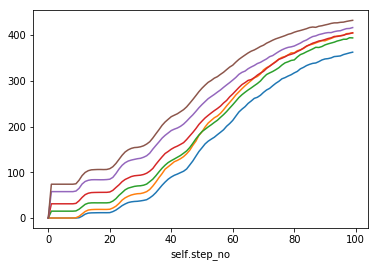

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

all_std = []
all_means = []
for i in range(6):
    print(i)
    first = [all_data[0][j + (i * 30)] for j in range (30)]

    df_concat = pd.concat(first)
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_std = by_row_index.std()
    print(df_std.head())
    all_std.append(df_std)
    all_means.append(df_means)
    print (df_means.head())


ax = plt.gca()

for means in all_means:
    means.plot(kind='line',x='self.step_no',y='compute_echo_chamber',ax=ax, legend=False)


plt.show()

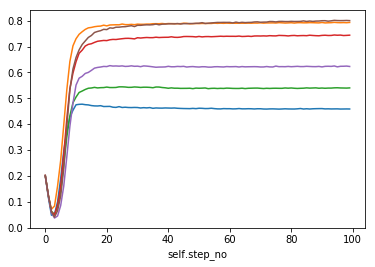

In [54]:
ax = plt.gca()

for means in all_means:
    means.plot(kind='line',x='self.step_no',y='radical_opinions',ax=ax, legend=False)


plt.show()

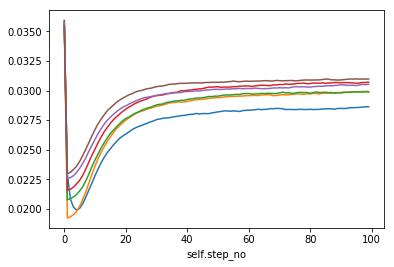

In [53]:
ax = plt.gca()

for means in all_means:
    means.plot(kind='line',x='self.step_no',y='compute_transitivity',ax=ax, legend=False )


plt.show()

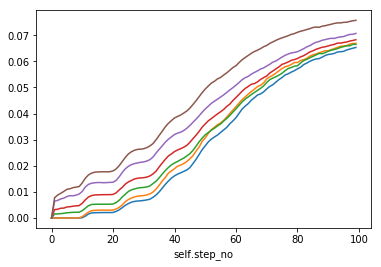

In [52]:
ax = plt.gca()

for means in all_means:
    means.plot(kind='line',x='self.step_no',y='echochamber_count',ax=ax, legend=False)


plt.show()